# Atividade: CNNs para Classificação

Neste notebook, iremos preparar nosso próprio dataset e treinar um modelo de classificação de imagens.

## Preparando os dados

Os dados desta atividade serão baixados da internet. Utilizaremos para isso buscadores comuns. Em seguida, dividiremos em treinamento e validação.

In [1]:
!pip install icrawler

import os
import shutil
import random
from icrawler.builtin import GoogleImageCrawler, BingImageCrawler

### Adquirindo as Imagens

Utilizaremos o iCrawler para baixar imagens em buscadores através de termos especificados. Defina sua lista de classes.

In [4]:
def download_images(keyword, folder, n_total=100):
    os.makedirs(folder, exist_ok=True)
    downloaded = len(os.listdir(folder))
    remaining = n_total - downloaded

    while downloaded < n_total:
        # BingImageCrawler
        crawler = BingImageCrawler(storage={'root_dir': folder})
        crawler.crawl(keyword=keyword, max_num=remaining, file_idx_offset=downloaded)
        downloaded = len(os.listdir(folder))
        remaining = n_total - downloaded
        print(f"Downloaded {downloaded}/{n_total}")

    print("Download complete!")

In [5]:
# definicao das classes e termos de busca
search_terms = {
    "gatos": "gato filhote", # classe 'gatos', busca 'gato filhote'
    "cachorros": "cachorro filhote", # classe 'cachorros', busca 'cachorro filhote'
}

# definicao de pasta para o dataset
data_root = "data/animais"

# download de 100 imagens por classe
for label, term in search_terms.items():
    download_images(term, f"{data_root}/{label}", n_total=100)

ERROR:downloader:Response status code 400, file https://media.istockphoto.com/id/106519096/pt/foto/um-lindo-filhote-de-gato-na-relva-verde.jpg
ERROR:downloader:Exception caught when downloading file https://www.vidamaisromrom.com.br/wp-content/uploads/2024/02/artigo1_imagem_texto-1.jpg, error: HTTPSConnectionPool(host='www.vidamaisromrom.com.br', port=443): Max retries exceeded with url: /wp-content/uploads/2024/02/artigo1_imagem_texto-1.jpg (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x7b3c9834ef30>, 'Connection to www.vidamaisromrom.com.br timed out. (connect timeout=5)')), remaining retry times: 2
ERROR:downloader:Exception caught when downloading file https://www.vidamaisromrom.com.br/wp-content/uploads/2024/02/artigo1_imagem_texto-1.jpg, error: HTTPSConnectionPool(host='www.vidamaisromrom.com.br', port=443): Max retries exceeded with url: /wp-content/uploads/2024/02/artigo1_imagem_texto-1.jpg (Caused by ConnectTimeoutError(<urllib3.connection.HTTPS

Downloaded 37/100


ERROR:downloader:Response status code 403, file https://p0.pikist.com/photos/898/856/gato-filhote-cat-young-animal-pet-domestic-kitten-cute.jpg
ERROR:downloader:Response status code 403, file https://www.pintarecolorir.com.br/imagem/animais-fazenda/desenho-gato-filhote-para-colorir.jpg
ERROR:downloader:Response status code 403, file https://www.pintarecolorir.com.br/imagem/gatos-desenhos/desenho-gato-filhote-colorir-com-novelo.jpg
ERROR:downloader:Response status code 403, file https://love.doghero.com.br/wp-content/uploads/2021/02/cat-329214_1280-1024x682.jpg
ERROR:downloader:Response status code 403, file https://love.doghero.com.br/wp-content/uploads/2021/02/cat-329214_1280.jpg


Downloaded 84/100


ERROR:downloader:Response status code 403, file https://p0.pikist.com/photos/898/856/gato-filhote-cat-young-animal-pet-domestic-kitten-cute.jpg


Downloaded 100/100
Download complete!


ERROR:downloader:Response status code 429, file https://segredosdomundo.r7.com/wp-content/uploads/2019/07/descubra-agora-5-cuidados-que-se-deve-ter-com-os-filhotes-de-cachorro-2.jpg
ERROR:downloader:Response status code 403, file https://www.oitomeia.com.br/wp-content/uploads/2021/01/Filhote-Cachorro-900x628-1.jpg
ERROR:downloader:Response status code 410, file https://www.tnh1.com.br/fileadmin/_processed_/e/8/csm_freepik_filhote_de_cachorro_e8ff0409fd.jpg


Downloaded 50/100


ERROR:downloader:Response status code 404, file https://adimax.com.br/wp-content/webp-express/webp-images/doc-root/wp-content/uploads/2022/05/cuidados-filhote-de-cachorro.jpg
ERROR:downloader:Response status code 403, file https://www.pintarecolorir.com.br/imagem/desenho-cachorro-filhote/filhote-de-cachorro-para-colorir-1.jpg
ERROR:downloader:Response status code 403, file https://www.pintarecolorir.com.br/imagem/filhote-cachorro-bolas/filhote-cachorro-brincando-bolas.jpg
ERROR:downloader:Response status code 403, file https://www.oitomeia.com.br/wp-content/uploads/2021/01/Filhote-Cachorro-900x628-1.jpg


Downloaded 100/100
Download complete!


### Treinamento e Validação

Dividiremos as imagens baixadas nas pastas `train` e `val`. Defina uma porcentagem.

In [6]:
def split_train_val(root_dir, train_ratio=0.8, seed=42):
    random.seed(seed)

    train_dir = root_dir + "_split/train"
    val_dir = root_dir + "_split/val"

    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(val_dir, exist_ok=True)

    for class_name in os.listdir(root_dir):
        class_path = os.path.join(root_dir, class_name)
        if not os.path.isdir(class_path):
            continue

        images = [os.path.join(class_path, f) for f in os.listdir(class_path)]
        images = [f for f in images if os.path.isfile(f)]
        random.shuffle(images)

        n_train = int(len(images) * train_ratio)

        train_class_dir = os.path.join(train_dir, class_name)
        val_class_dir = os.path.join(val_dir, class_name)
        os.makedirs(train_class_dir, exist_ok=True)
        os.makedirs(val_class_dir, exist_ok=True)

        for img in images[:n_train]:
            shutil.copy(img, os.path.join(train_class_dir, os.path.basename(img)))
        for img in images[n_train:]:
            shutil.copy(img, os.path.join(val_class_dir, os.path.basename(img)))

        print(f"{class_name}: {n_train} train, {len(images)-n_train} val")


data_root = "data/animais"
split_train_val(data_root, train_ratio=0.8)

gatos: 80 train, 20 val
cachorros: 80 train, 20 val


## Dataset

Implemente um Dataset PyTorch que carregue as imagens baixadas com suas respectivas classes. Aplique data augmentation e carregue em batches.

In [7]:

import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from PIL import Image

# definicao dos caminhos
data_dir = "data/animais_split"
train_dir = os.path.join(data_dir, "train")
val_dir = os.path.join(data_dir, "val")

# definicao das transformacoes (data augmentation)
IMG_SIZE = 224
NORM_MEAN = [0.485, 0.456, 0.406]
NORM_STD = [0.229, 0.224, 0.225]

# transformacoes de treinamento(data augmentation)
train_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize(NORM_MEAN, NORM_STD)
])

# tranformacoes de validacao
val_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(NORM_MEAN, NORM_STD)
])

# carregamento dos datasets com "ImageFolder"
train_dataset = datasets.ImageFolder(train_dir, transform=train_transforms)
val_dataset = datasets.ImageFolder(val_dir, transform=val_transforms)

# criacao de dataloader
BATCH_SIZE = 32

train_loader = DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=2
)

val_loader = DataLoader(
    val_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=2
)

print("Datasets e DataLoaders criados com sucesso!")
print(f"Classes encontradas: {train_dataset.classes}")

class_names = train_dataset.classes
num_classes = len(class_names)

print(f"Número de classes: {num_classes}")
print(f"Total de imagens de treino: {len(train_dataset)}")
print(f"Total de imagens de validação: {len(val_dataset)}")

Datasets e DataLoaders criados com sucesso!
Classes encontradas: ['cachorros', 'gatos']
Número de classes: 2
Total de imagens de treino: 160
Total de imagens de validação: 40


## Definição do Modelo

Defina aqui o modelo que será utilizado, sendo implementação própria ou um modelo pré-treinado. Teste diversas arquiteturas diferentes e verifique qual delas tem melhor desempenho em validação.

In [8]:
import torch.nn as nn
from torchvision import models

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Usando dispositivo: {device}")

# carregamento do modelo pre treinado
model = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)

for param in model.parameters():
    param.requires_grad = False

# substituindo a ultima camada
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, num_classes)

model = model.to(device)

print("\nModelo (ResNet18) definido e modificado para transfer learning.")
print("Apenas a última camada (model.fc) será treinada.")


Usando dispositivo: cuda
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 228MB/s]



Modelo (ResNet18) definido e modificado para transfer learning.
Apenas a última camada (model.fc) será treinada.


## Treinamento

Defina a função de custo e o otimizador do modelo. Em seguida, implemente o código de treinamento e treine-o. Ao final, exiba as curvas de treinamento e validação para a loss e a acurácia.

Iniciando o treinamento...

Epoch 1/10
----------
Train Loss: 0.6171 Acc: 0.6688
Val Loss: 0.4738 Acc: 0.8250
Tempo da época: 3.21s

Epoch 2/10
----------
Train Loss: 0.4469 Acc: 0.8188
Val Loss: 0.3357 Acc: 0.9750
Tempo da época: 2.63s

Epoch 3/10
----------
Train Loss: 0.3531 Acc: 0.8875
Val Loss: 0.2761 Acc: 0.9750
Tempo da época: 3.19s

Epoch 4/10
----------
Train Loss: 0.2695 Acc: 0.9250
Val Loss: 0.2555 Acc: 0.9500
Tempo da época: 2.96s

Epoch 5/10
----------
Train Loss: 0.2245 Acc: 0.9375
Val Loss: 0.2132 Acc: 0.9750
Tempo da época: 2.64s

Epoch 6/10
----------
Train Loss: 0.2247 Acc: 0.9500
Val Loss: 0.1949 Acc: 1.0000
Tempo da época: 2.56s

Epoch 7/10
----------
Train Loss: 0.1682 Acc: 0.9625
Val Loss: 0.1787 Acc: 0.9750
Tempo da época: 2.65s

Epoch 8/10
----------
Train Loss: 0.1710 Acc: 0.9688
Val Loss: 0.1656 Acc: 0.9750
Tempo da época: 3.63s

Epoch 9/10
----------
Train Loss: 0.1371 Acc: 0.9688
Val Loss: 0.1665 Acc: 0.9750
Tempo da época: 2.55s

Epoch 10/10
----------
Trai

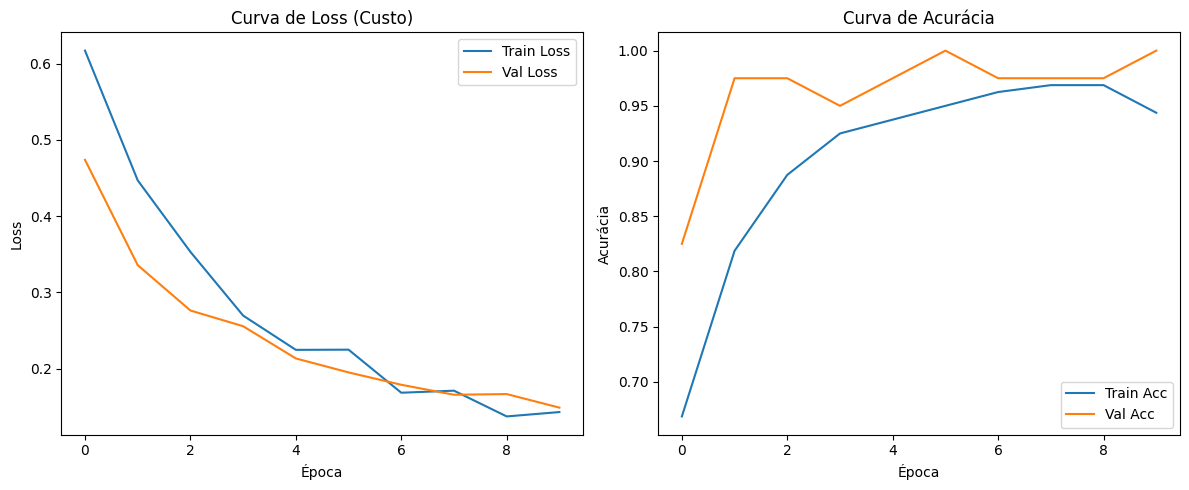

In [9]:
import torch.optim as optim
import matplotlib.pyplot as plt
import time
import copy

# definicao da funcao de custo e otimizador
criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.fc.parameters(), lr=0.001)
num_epochs = 10

# guardar o historico
history = {
    'train_loss': [], 'train_acc': [],
    'val_loss': [], 'val_acc': []
}

# salvar melhor modelo e acuracia
best_model_wts = copy.deepcopy(model.state_dict())
best_acc = 0.0

print("Iniciando o treinamento...")

for epoch in range(num_epochs):
    start_time = time.time()
    print(f"\nEpoch {epoch+1}/{num_epochs}")
    print("-" * 10)

    for phase in ['train', 'val']:
        if phase == 'train':
            model.train()
            dataloader = train_loader
        else:
            model.eval()
            dataloader = val_loader

        running_loss = 0.0
        correct_preds = 0
        total_samples = 0


        for inputs, labels in dataloader:

            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()

            # habilitar gradientes na fase de treino
            with torch.set_grad_enabled(phase == 'train'):
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                # backward pass + otimizacao
                if phase == 'train':
                    loss.backward()
                    optimizer.step()

            # stats
            running_loss += loss.item() * inputs.size(0)
            correct_preds += torch.sum(preds == labels.data)
            total_samples += labels.size(0)

        # calculo da loss e acuracia da epoca
        epoch_loss = running_loss / total_samples
        epoch_acc = correct_preds.double() / total_samples

        print(f"{phase.capitalize()} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}")

        if phase == 'train':
            history['train_loss'].append(epoch_loss)
            history['train_acc'].append(epoch_acc.item())
        else:
            history['val_loss'].append(epoch_loss)
            history['val_acc'].append(epoch_acc.item())

        if phase == 'val' and epoch_acc > best_acc:
            best_acc = epoch_acc
            best_model_wts = copy.deepcopy(model.state_dict())

    print(f"Tempo da época: {time.time() - start_time:.2f}s")

print(f"\nTreinamento finalizado. Melhor Acurácia de ValDa: {best_acc:.4f}")

# carrega os pesos do melhor modelo
model.load_state_dict(best_model_wts)

# plot das curvas de treinamento e validacao
plt.figure(figsize=(12, 5))

# plot de Loss
plt.subplot(1, 2, 1)
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.title('Curva de Loss (Custo)')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()

# plot de acuracia
plt.subplot(1, 2, 2)
plt.plot(history['train_acc'], label='Train Acc')
plt.plot(history['val_acc'], label='Val Acc')
plt.title('Curva de Acurácia')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()

plt.tight_layout()
plt.show()

## Inferência

Calcule algumas métricas como acurácia, matriz de confusão, etc. Em seguida, teste o modelo em novas imagens das classes correspondentes mas de outras fontes (outro buscador, fotos próprias, etc).

Relatório de Classificação
              precision    recall  f1-score   support

   cachorros       1.00      1.00      1.00        20
       gatos       1.00      1.00      1.00        20

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40


 Matriz de Confusão


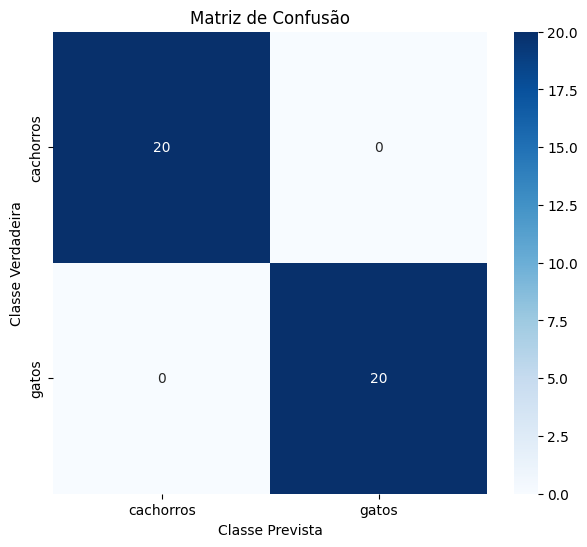


teste com imagem nova
Baixando imagem de teste...


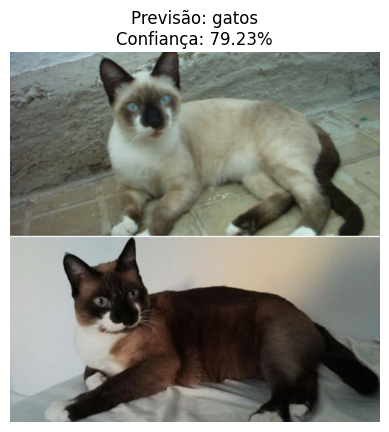

In [11]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

model.eval()
all_preds = []
all_labels = []

# desativacao do calculo de gradientes
with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

print("Relatório de Classificação")

# 'target_names=class_names' usa os nomes "gatos", "cachorros"
print(classification_report(all_labels, all_preds, target_names=class_names))

# matriz de confusao
print("\n Matriz de Confusão")
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Matriz de Confusão')
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Verdadeira')
plt.show()


# teste de novas imagens

def predict_image(image_path, model, transforms, class_names_list):
    """Carrega uma imagem, aplica transformações e retorna a previsão."""
    try:
        image = Image.open(image_path).convert('RGB')
    except Exception as e:
        print(f"Erro ao abrir a imagem {image_path}: {e}")
        return

    image_tensor = transforms(image).unsqueeze(0)
    image_tensor = image_tensor.to(device)
    model.eval()

    # predicao
    with torch.no_grad():
        outputs = model(image_tensor)
        # aplica softmax para obter probabilidades (confiança)
        probabilities = torch.nn.functional.softmax(outputs, dim=1)
        # usa classe com maior probabilidade
        _, pred_index = torch.max(outputs, 1)

        class_name = class_names_list[pred_index.item()]
        confidence = probabilities[0][pred_index.item()].item()

    # plot de imagem e previsão
    plt.imshow(image)
    plt.title(f"Previsão: {class_name}\nConfiança: {confidence*100:.2f}%")
    plt.axis('off')
    plt.show()

    return class_name, confidence

print("\nteste com imagem nova")
test_folder = "data/test_images"
os.makedirs(test_folder, exist_ok=True)

try:
    print("Baixando imagem de teste...")
    crawler_test = BingImageCrawler(storage={'root_dir': test_folder})
    crawler_test.crawl(keyword="gato siames adulto", max_num=1)

    test_image_name = os.listdir(test_folder)[0]
    test_image_path = os.path.join(test_folder, test_image_name)

    predict_image(test_image_path, model, val_transforms, class_names)

except Exception as e:
    print(f"Não foi possível baixar a imagem de teste: {e}")
    print("Por favor, baixe uma imagem de gato ou cachorro manualmente,")
    print("jogue na pasta 'data/test_images' e rode a célula novamente.")